Code for simulations used in Bleuven et al. in response to a reviewers' comments. 

The reviewer requested a demonstration from simulation that using relative barcode frequencies from read counts at the initial and final timepoints allowed to estimate relative (ranks) fitness.

We show below using exponential growth and decay as examples, that the ranking of fitness values can be measured using changes in relative barcode counts. 

In [32]:
library(tidyverse)

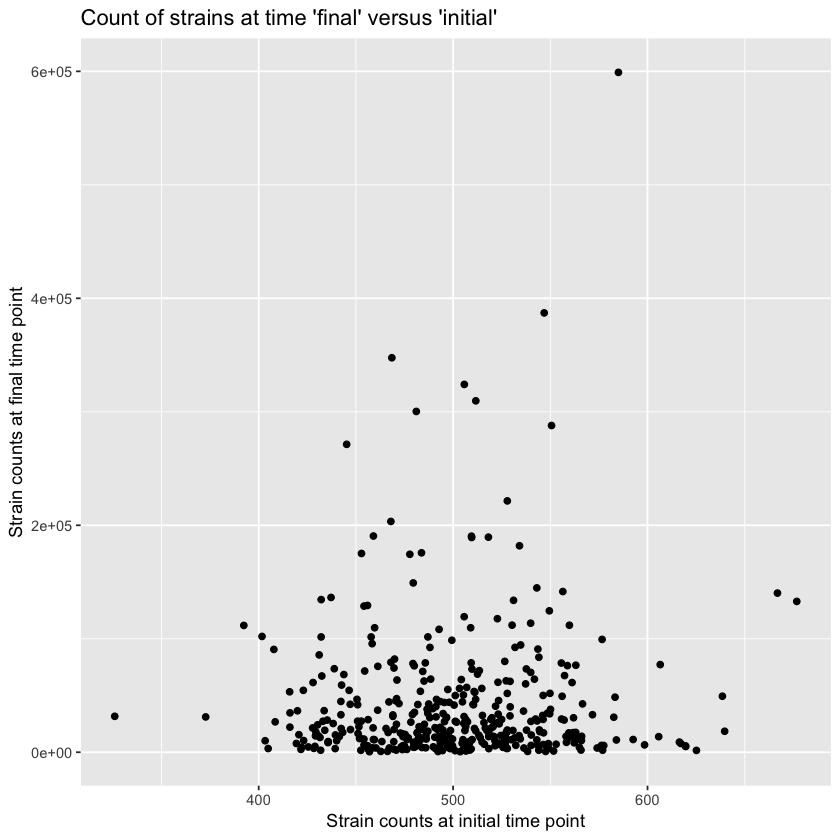

In [33]:
#Get a list of initial counts
#Simulate 400 strains, with 500 counts on average and a variance of 50
fini <- rnorm(400, 500, 50)

#assign fitness (growth rate) values randomly to each strain
#the average is 1 with variance of 0.2. Normalize to have min 0 and max 1
x = rnorm(400,1,0.2)

# normalize
min.x = min(x)
max.x = max(x)

f_rand_fit  = (x - min.x)/(max.x - min.x)

#make population growth. 
#assume time of 10

fend_r <- fini*(1+f_rand_fit)^10
counts <- data.frame(cbind(fini, fend_r))

#plot the final versus the initial counts
ggplot(counts, aes(x=fini, y=fend_r))+
  geom_point()+
  labs(
    title="Count of strains at time 'final' versus 'initial'",
    x = "Strain counts at initial time point",
    y = "Strain counts at final time point"
  )

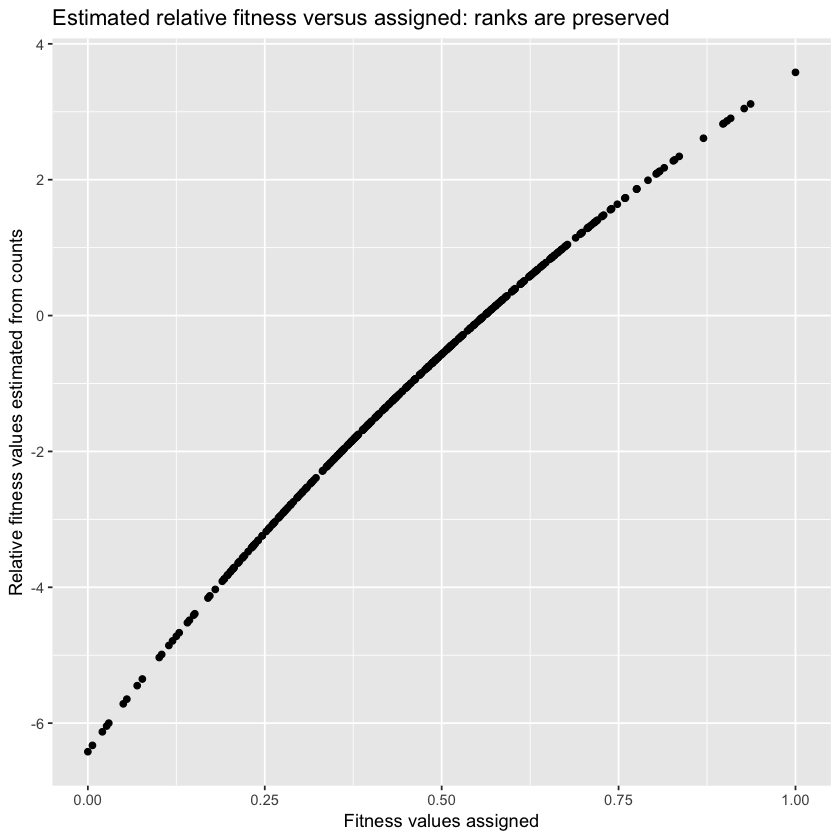

In [34]:
#Estimate relative fitness as in the paper
#as the relative frequency of the strain in pool at the end
#versus the relative frequency of the sequence at the beggining
fini_rel <- fini/sum(fini)
#calculate the relative frequency of each strain at the final time point
fend_r_rel <- fend_r/sum(fend_r)

#take the log2 ratio of the two
relfit <- log2(fend_r_rel/fini_rel)

fitness <- data.frame(cbind(relfit, f_rand_fit))

#plot the estimated relative fitness versus the assigned ones

ggplot(fitness, aes(x=f_rand_fit, y=relfit))+
  geom_point()+
  labs(
    title="Estimated relative fitness versus assigned: ranks are preserved",
    x = "Fitness values assigned",
    y = "Relative fitness values estimated from counts"
  )


Second scenario 

Assumes that there are genotype specific death rates. 
We can use an exponential decay function of the type y=a(1-b)^x
where the decay factor is represented by b, which is a percentage by which the original amount will decline each time interval. This could be seen as a death rate and thus inversely proportional to fitness.
We assigned survival rates from a normal distribution but normalized so we have only positive values


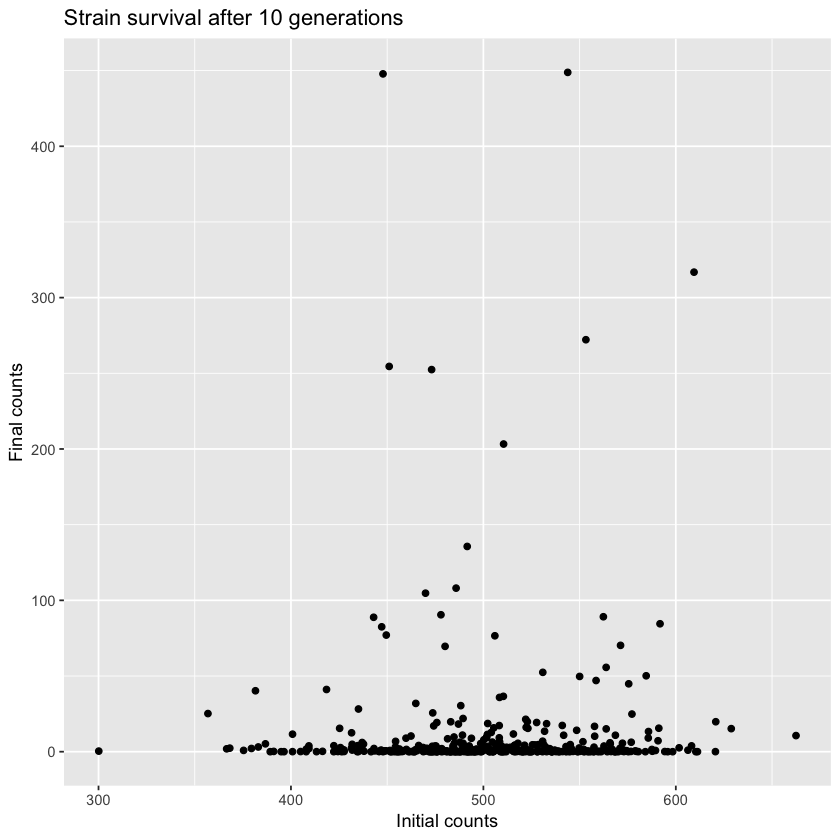

In [35]:
#assign some survival rate values
x = rnorm(400,1,0.2)

# normalize
min.x = min(x)
max.x = max(x)

rand_survival_prob = (x - min.x)/(max.x - min.x)
# divide by max value to have a max rate of 1

ini_rand_counts <- rnorm(400, 500, 50) #as above

final_counts <- ini_rand_counts  * (1-rand_survival_prob)^10
data_death = data.frame(cbind(ini_rand_counts,final_counts,rand_survival_prob))

ggplot(data_death, aes(x=ini_rand_counts, y=final_counts))+
  geom_point()+
  labs(
    title="Strain survival after 10 generations",
    x = "Initial counts",
    y = "Final counts"
  )

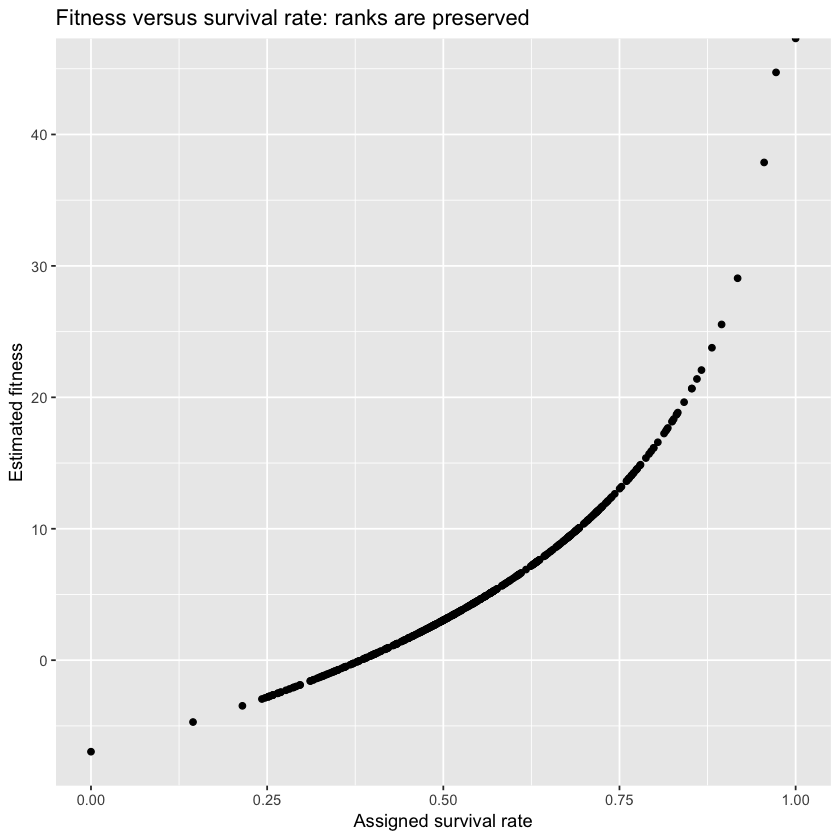

In [31]:
#calculate fitness from counts
data_death$estimated_fitesses = log2( (data_death$ini_rand_counts/sum(data_death$ini_rand_counts)) / (data_death$final_counts/sum(data_death$final_counts)))

ggplot(data_death, aes(x=rand_survival_prob, y=estimated_fitesses ))+
  geom_point()+
  labs(
    title="Fitness versus survival rate: ranks are preserved",
    x = "Assigned survival rate",
    y = "Estimated fitness"
  )
